In [1]:
# Standard libraries
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath

from lib.sych.data_fc_db_raw import DataFCDatabase
import lib.sych.pre_trial_prediction as pre_trial_prediction

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


TODO:
* Fit slow background to get rid of drift
* Fast background
    * Test if there exists variation on the order of 10-20 trials
    * Fit and extract
* Testing
    - Calc average activity over pre-trial, tex and reward (and maybe fast baseline)
    - Train classifier for trial type
    - Test
    - Try tSNE + color

In [2]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
# params['root_path_data'] = './'
params['root_path_data'] = '/media/alyosha/Data/TE_data/yarodata/sych_preprocessed'
# params['root_path_data'] = gui_fpath('h5path', './')

In [3]:
dataDB = DataFCDatabase(params)

Searching for data files
Extracting trial type names
Extracting data types


# Have a look at raw data with trials

<IPython.core.display.Javascript object>


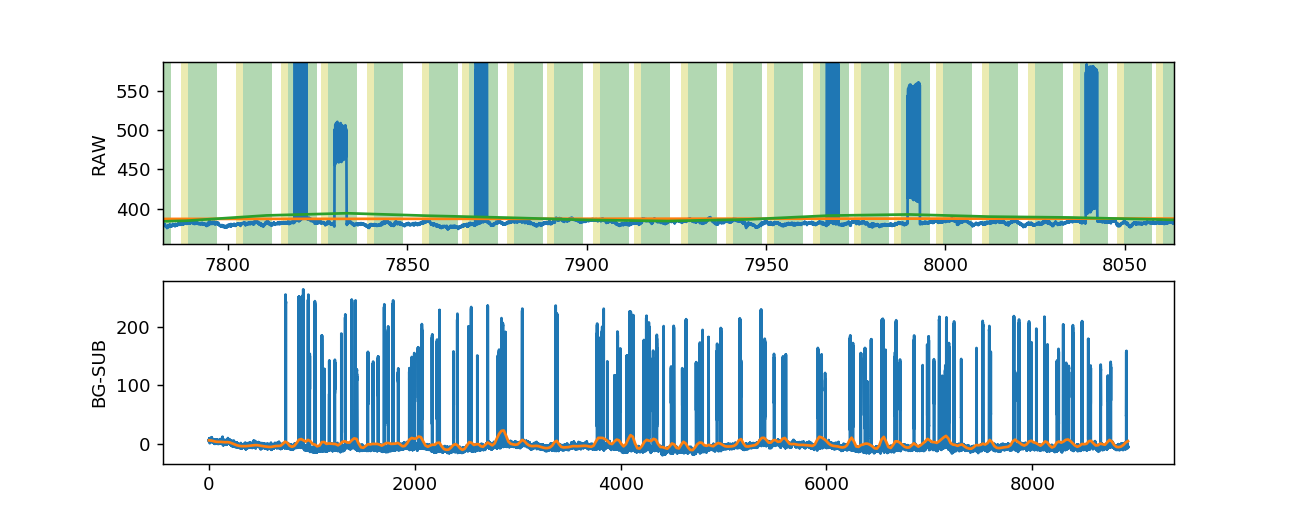

In [5]:
%matplotlib notebook
sessions = dataDB.get_sessions('mvg_4')
pre_trial_prediction.plot_session(dataDB, sessions[-1], channelIdx=18)

# Preparing data

In [ ]:
intervalsTrg = {
    'PRE': [-1.0, 0.0],
    'TEX': [3.0, 3.5],
    'REW': [6.0, 6.5],
}

In [ ]:
dataIndexed, dataDF = pre_trial_prediction.prepare_data(dataDB, intervalsTrg, bgSub=True)

# Exploratory Testing
* Test if GO vs NOGO significant for each session and channel

In [ ]:
%matplotlib inline

pre_trial_prediction.test_prediction(dataDB, dataIndexed, dataDF, intervalsTrg)